# Task 1: Few-shot Case

### Task Definition
Your task is to develop a classification model that is constructed (trained) based on the
provided training images and to measure and evaluate it on the provided test dataset.
Use the data provided in the coco_crops_few_shot/ directory.
We leave the choice of metrics and visualization techniques you use to present your
findings up to you.

### My Approach (ilker)
I use CLIP's image encoder as the feature extractor. Then, I train a simple classifier, which takes the features as input instead of the raw image itself. 

## Load a pre-trained model.
First, let's load one of the pretrained models along with the preprocessing.

In [1]:
import os
import clip
import torch

import numpy as np
from sklearn.linear_model import LogisticRegression

import torchvision 
import pickle

from utils import get_features, plot_confusion_matrix
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

print("Available device: ", device)

Available device:  cpu


## Set dataset paths

The custom dataset has Pytorch dataset structure, so we can load it straithforwardly.


In [2]:
train_dataset = torchvision.datasets.ImageFolder(root="../data/coco_crops_few_shot/train", transform=preprocess)
test_dataset = torchvision.datasets.ImageFolder(root="../data/coco_crops_few_shot/test", transform=preprocess)

## Extract features

This function iterates over the dataset, and extract features from the images using the model's image encoder.

In [3]:

# Calculate the image features
train_features, train_labels = get_features(train_dataset, model,device)
test_features, test_labels = get_features(test_dataset, model, device)

print("Train features, train labels: {}, {}".format(train_features.shape, train_labels.shape))
print("Test features, test labels: {}, {}".format(test_features.shape, test_labels.shape))


100%|██████████| 6/6 [00:28<00:00,  4.78s/it]

Train features, train labels: (234, 512), (234,)
Test features, test labels: (503, 512), (503,)


## Classification of features

We train a classifier taking the features as input.
Print the classifier accuracy on the test set.

In [11]:
# Perform logistic regression
classifier = LogisticRegression(random_state=0, C=0.316, max_iter=1000, verbose=1)
classifier.fit(train_features, train_labels)

# Evaluate using the logistic regression classifier
predictions = classifier.predict(test_features)
accuracy = np.mean((test_labels == predictions).astype(np.float)) * 100.
print(f"Accuracy = {accuracy:.3f}")


[LibLinear]Accuracy = 89.662


/home/ilker/anaconda3/envs/uavadnet/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ilker/anaconda3/envs/uavadnet/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Plot confusion matrix

Confusion matrix represents the predictor performance for each class explicitly.

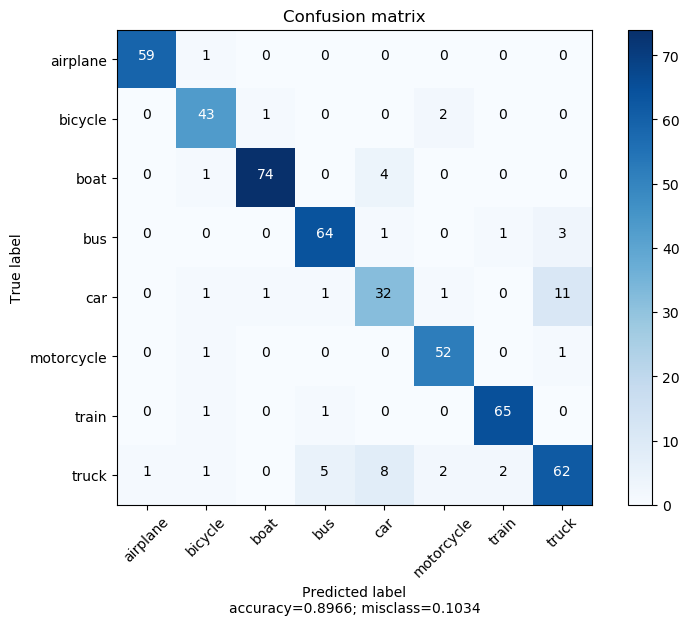

In [13]:
from sklearn.metrics import precision_score, confusion_matrix

cm = confusion_matrix(test_labels, predictions)

plot_confusion_matrix(cm, [f for f in train_dataset.class_to_idx.keys()], normalize=False)

## Save the classifier
Save the classifier for the second task.

In [14]:
filename = 'task1_classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))